C:\Users\chunc\AppData\Local\Temp\ipykernel_9368\3259321572.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_a['Year'] = df_netflix_a['Release Date'].dt.year
C:\Users\chunc\AppData\Local\Temp\ipykernel_9368\3259321572.py:110: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<function matplotlib.pyplot.show(close=None, block=None)>

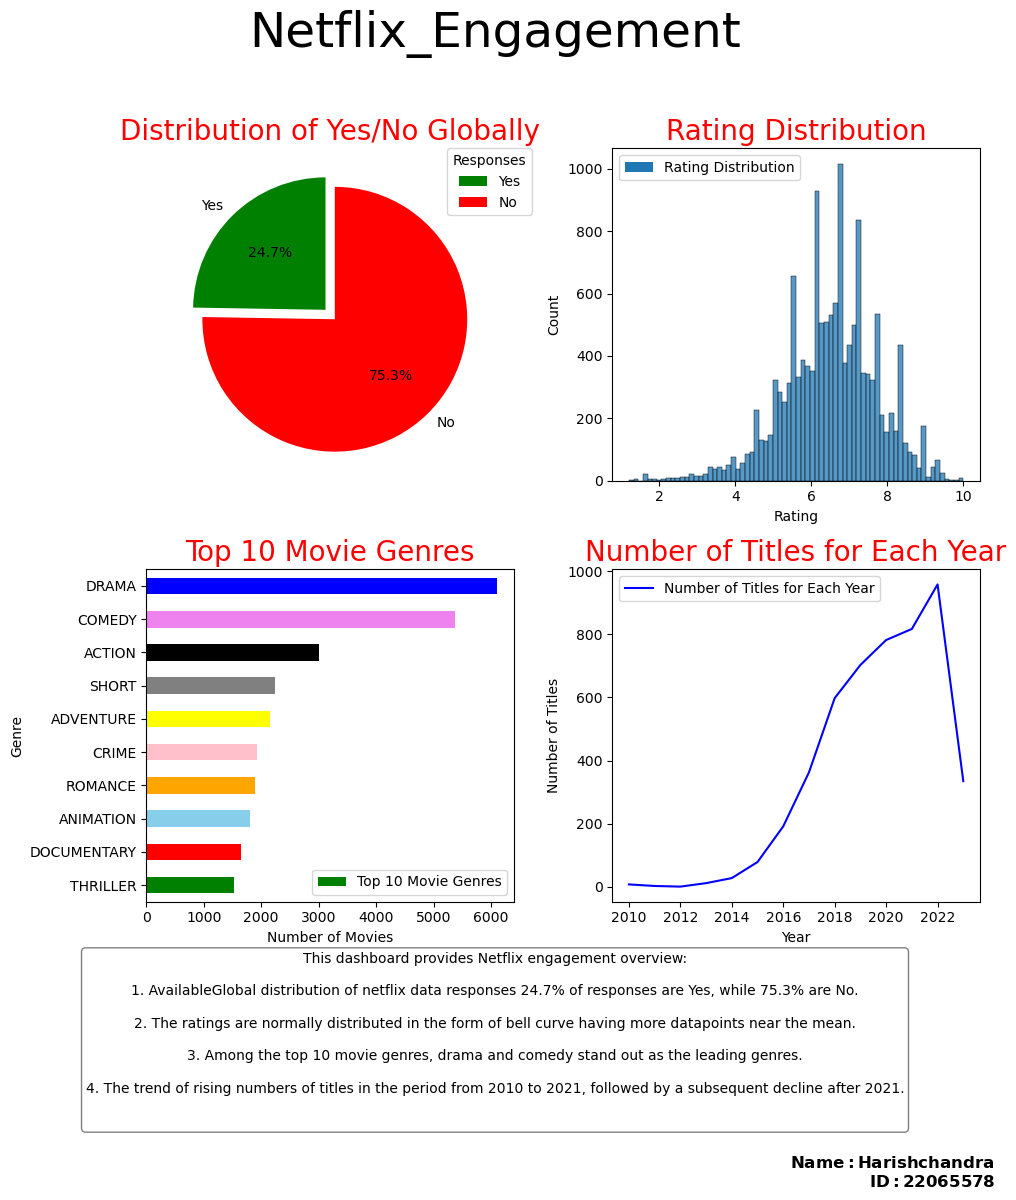

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

#Read the csv file using pandas
df_netflix = pd.read_csv("Netflix_Engagement.csv")

#Final visualisation dashboard
def pie_plot():
    """
    This function plots the piechart for distribution of globally available 
    and unavailable titles in netflix from the current dataset.

    """

    labels = ['Yes', 'No']
    sizes = [4534, 13798]
    total = sum(sizes)
    explode = (0.05, 0.05)
    percentages = [(size / total) * 100 for size in sizes]
    wedges, texts, autotexts = axes[0, 0].pie(
        percentages, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
    axes[0, 0].set_title('Distribution of Yes/No Globally',
                         fontsize=20, color='red')
    # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[0, 0].axis('equal')
    # Add legend
    axes[0, 0].legend(wedges, labels, title='Responses',
                      loc='center left', bbox_to_anchor=(0.8, 0, 0.5, 1.8))
    

def hist_plot():
    """
    This function plots the histogram chart for total count on rating distribution from the current dataset
    """
    sns.histplot(df_netflix, x='Rating', ax=axes[0, 1])
    axes[0, 1].set_title('Rating Distribution', fontsize=20, color='red')
    axes[0, 1].legend(labels=['Rating Distribution'])


def bar_plot():
    """
    This function plots the bar chart 
    """
    keywords_list = [keyword.strip().strip("[]").replace("'", "").upper(
    ) for genre in df_netflix['Genre'] if isinstance(genre, str) for keyword in genre.split(',')]
    keyword_counts = Counter(keywords_list)
    top_n_genres = dict(keyword_counts.most_common(10))
    top_genres_df = pd.DataFrame(list(top_n_genres.items()), columns=[
                                 'Keyword', 'Frequency'])
    top_genres_df = pd.DataFrame(list(top_n_genres.items()), columns=[
                                 'Keyword', 'Frequency'])
    top_genres_df.sort_values(by='Frequency').plot(kind='barh', x='Keyword', y='Frequency', color=[
        'green', 'red', 'skyblue', 'orange', 'pink', 'yellow', 'grey', 'black', 'violet', 'blue'], ax=axes[1, 0])
    axes[1, 0].set_xlabel('Number of Movies')
    axes[1, 0].set_ylabel('Genre')
    axes[1, 0].set_title('Top 10 Movie Genres', fontsize=20, color='red')
    axes[1, 0].legend(labels=['Top 10 Movie Genres'])


def line_plot():
    """
    This function plots the line chart with  number of titles released in each year from the current dataset.
    """
    df_netflix['Release Date'] = pd.to_datetime(
        df_netflix['Release Date'], errors='coerce')
    df_netflix_a = df_netflix.dropna(subset=['Release Date'])
    df_netflix_a['Year'] = df_netflix_a['Release Date'].dt.year
    yearly_counts = df_netflix_a['Year'].value_counts()
    yearly_counts.sort_index().plot(kind='line', color='blue', ax=axes[1, 1])
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Titles')
    axes[1, 1].set_title('Number of Titles for Each Year',
                         fontsize=20, color='red')
    axes[1, 1].legend(labels=['Number of Titles for Each Year'])


# Create a 2x2 grid layout for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

pie_plot()
hist_plot()
bar_plot()
line_plot()

# Adjust layout
plt.tight_layout()

# Add explanatory text
summary_text = (
    "This dashboard provides Netflix engagement overview:\n\n"
    "1. AvailableGlobal distribution of netflix data responses 24.7% of responses are Yes, while 75.3% are No.\n\n"
    "2. The ratings are normally distributed in the form of bell curve having more datapoints near the mean.\n\n"
    "3. Among the top 10 movie genres, drama and comedy stand out as the leading genres.\n\n"
    "4. The trend of rising numbers of titles in the period from 2010 to 2021, followed by a subsequent decline after 2021.\n\n"
    )

fig.text(0.5, -0.05, summary_text, ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Add a title to the entire 2x2 grid layout
fig.suptitle('Netflix_Engagement', fontsize=35, color='black')

# Add Name and ID to the bottom right with bold style
name_id_text = r'$\bf{Name: Harishchandra}$'+'\n'+ r'$\bf{ID: 22065578}$'
fig.text(1, -0.20, name_id_text, ha='right', va='bottom', fontsize=12, color='black')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  

#save image
plt.savefig('22065578.png',bbox_inches='tight', dpi=300)


#display plot
plt.show